<h1> <center><font color='green' > <b>AGN Classifier for AGNDB</b></font> </center></h1>

# Model Performance Evaluation
by Sicong Huang <br> \
<font color='blue'>Python Version: 3.6.5 <br>
AGNDB Version: 1.1.0

# THE QUESTION: <br><font color='green'>How to use ML methods to classify agn and non-agns?</font>

# Goal of Model Performance Evaluation
<font color='green'>

- Define metrics.
- Evaluate model performance based on metrics.
- Identify bias and variance problems if any.
    
    

# Import

In [1]:
# System
import os
import glob
from tqdm import tqdm
from IPython.display import Markdown, display, Audio

# Web Scraping

# Data Analysis
import pandas as pd
import numpy as np

# Machine Learning
from scipy import stats
import sklearn
import joblib
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from tensorflow import keras
import keras.backend as K

# Data Visualization
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import seaborn as sns

pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline

# Functions

In [2]:
def sound_effect(fail=0):
    """
    Play a sound when job is finished
    """
    if fail == 0:
        sound_file = '/data/home/sicong/sounds/jobs-done_1.mp3'
        display(Audio(sound_file, autoplay=True))
    else:
        sound_file = '/data/home/sicong/sounds/oh-shit-im-sorry_0001.mp3'
        display(Audio(sound_file, autoplay=True))

In [3]:
def printmd(string):
    """
    print in markdown style
    """
    display(Markdown(string))

In [4]:
def conf_matrix(y_test, pred_test):    
    
    # Creating a confusion matrix
    con_mat = confusion_matrix(y_test, pred_test)
    con_mat = pd.DataFrame(con_mat, range(2), range(2))
   
    #Ploting the confusion matrix
    plt.figure(figsize=(3,3))
    sns.set(font_scale=1.5) 
    ax = sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)
    ax.set(xlabel='Predicted Values', ylabel='Actual Value')
    plt.show()
    

# Read train/dev/test sets

In [5]:
df_train = pd.read_pickle('agncl_train.pkl')
df_dev = pd.read_pickle('agncl_dev.pkl')

In [6]:
# True lables
y_train = np.array(df_train['AGN'])

y_dev = np.array(df_dev['AGN'])

# Read results

In [7]:
# Logestic Regression
%store -r yhat_train_lr
%store -r yhat_dev_lr
%store -r yhat_train_prob_lr
%store -r yhat_dev_prob_lr


# Decision Tree
%store -r yhat_train_Tree
%store -r yhat_dev_Tree
%store -r yhat_train_prob_Tree
%store -r yhat_dev_prob_Tree


# KNN
%store -r yhat_train_knn
%store -r yhat_dev_knn
%store -r yhat_train_prob_knn
%store -r yhat_dev_prob_knn


# CNN
%store -r yhat_train_cnn
%store -r yhat_dev_cnn
%store -r yhat_dev_prob_cnn
%store -r yhat_train_prob_cnn


# Model Evaluation

## Metrics
Accuracy is used when the True Positives and True negatives are more important while F1-score is used when the False Negatives and False Positives are crucial

- <font color='green'>AGN completeness (True Positive Rate/recall) </font>: 
    - TP/(TP+FN)
    - measures the proportion of AGN that are correctly identified
- <font color='green'>non-AGN completeness (True Negative Rate/Specificity)</font>: 
    - TN/(TN+FP)
    - measures the proportion of non-AGN that are correctly identified
- <font color='green'>F1 score (Major Metric)</font>: 
    - The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision.
    - We use the weighted average of the F1-score for both labels, with average='weighted'. This favors the major class.
    - This metric is what we use in cross-validation and grid search.
- <font color='green'>Balanced Accuracy</font>: 
    - The balanced accuracy in binary and multiclass classification problems to deal with imbalanced datasets. It is defined as the average of recall obtained on each class.
    - It is defined as 0.5x(Recall+Sensitivity)
- <font color='green'>ROC AUC</font>


### Evaluate on Validation Set

In [8]:
# LogisticRegression
f1_dev_lr = f1_score(y_dev, yhat_dev_lr, average='weighted')
recall_dev_lr = recall_score(y_dev, yhat_dev_lr)
spec_dev_lr = recall_score(y_dev, yhat_dev_lr, pos_label=0)
acc_dev_lr = balanced_accuracy_score(y_dev, yhat_dev_lr)
auc_dev_lr = roc_auc_score(y_dev, yhat_dev_lr, average='weighted')

# KNN
f1_dev_knn = f1_score(y_dev, yhat_dev_knn, average='weighted')
recall_dev_knn = recall_score(y_dev, yhat_dev_knn)
spec_dev_knn = recall_score(y_dev, yhat_dev_knn, pos_label=0)
acc_dev_knn = balanced_accuracy_score(y_dev, yhat_dev_knn)
auc_dev_knn = roc_auc_score(y_dev, yhat_dev_knn, average='weighted')

# Decision Tree
f1_dev_Tree = f1_score(y_dev, yhat_dev_Tree, average='weighted')
recall_dev_Tree = recall_score(y_dev, yhat_dev_Tree)
spec_dev_Tree = recall_score(y_dev, yhat_dev_Tree, pos_label=0)
acc_dev_Tree = balanced_accuracy_score(y_dev, yhat_dev_Tree)
auc_dev_Tree = roc_auc_score(y_dev, yhat_dev_Tree, average='weighted')

# SVM
# f1_dev_svm = f1_score(y_dev, yhat_svm, average='weighted')
# recall_dev_svm = recall_score(y_dev, yhat_svm)
# spec_dev_svm = recall_score(y_dev, yhat_svm, pos_label=0)
# acc_dev_svm = balanced_accuracy_score(y_dev, yhat_svm)
# auc_dev_svm = roc_auc_score(y_dev, yhat_svm, average='weighted')

# AGN_NN
f1_dev_cnn = f1_score(y_dev, yhat_dev_cnn, average='weighted')
recall_dev_cnn = recall_score(y_dev, yhat_dev_cnn)
spec_dev_cnn = recall_score(y_dev, yhat_dev_cnn, pos_label=0)
acc_dev_cnn = balanced_accuracy_score(y_dev, yhat_dev_cnn)
auc_dev_cnn = roc_auc_score(y_dev, yhat_dev_cnn, average='weighted')

### Evaluate on Training Set

In [9]:
# LogisticRegression
f1_train_lr = f1_score(y_train, yhat_train_lr, average='weighted')
recall_train_lr = recall_score(y_train, yhat_train_lr)
spec_train_lr = recall_score(y_train, yhat_train_lr, pos_label=0)
acc_train_lr = balanced_accuracy_score(y_train, yhat_train_lr)
auc_train_lr = roc_auc_score(y_train, yhat_train_lr, average='weighted')

# KNN
f1_train_knn = f1_score(y_train, yhat_train_knn, average='weighted')
recall_train_knn = recall_score(y_train, yhat_train_knn)
spec_train_knn = recall_score(y_train, yhat_train_knn, pos_label=0)
acc_train_knn = balanced_accuracy_score(y_train, yhat_train_knn)
auc_train_knn = roc_auc_score(y_train, yhat_train_knn, average='weighted')

# Decision Tree
f1_train_Tree = f1_score(y_train, yhat_train_Tree, average='weighted')
recall_train_Tree = recall_score(y_train, yhat_train_Tree)
spec_train_Tree = recall_score(y_train, yhat_train_Tree, pos_label=0)
acc_train_Tree = balanced_accuracy_score(y_train, yhat_train_Tree)
auc_train_Tree = roc_auc_score(y_train, yhat_train_Tree, average='weighted')

# SVM
# f1_dev_svm = f1_score(y_dev, yhat_svm, average='weighted')
# recall_dev_svm = recall_score(y_dev, yhat_svm)
# spec_dev_svm = recall_score(y_dev, yhat_svm, pos_label=0)
# acc_dev_svm = balanced_accuracy_score(y_dev, yhat_svm)
# auc_dev_svm = roc_auc_score(y_dev, yhat_svm, average='weighted')

# AGN_NN
f1_train_cnn = f1_score(y_train, yhat_train_cnn, average='weighted')
recall_train_cnn = recall_score(y_train, yhat_train_cnn)
spec_train_cnn = recall_score(y_train, yhat_train_cnn, pos_label=0)
acc_train_cnn = balanced_accuracy_score(y_train, yhat_train_cnn)
auc_train_cnn = roc_auc_score(y_train, yhat_train_cnn, average='weighted')

In [10]:
metric_data = np.array((['Logistic Regression', 'Train', recall_train_lr, spec_train_lr, f1_train_lr, acc_train_lr, 1-acc_train_lr, auc_train_lr],
                        ['Logistic Regression', 'Validation', recall_dev_lr, spec_dev_lr, f1_dev_lr, acc_dev_lr, 1-acc_dev_lr, auc_dev_lr],
                        ['Decision Tree', 'Train', recall_train_Tree, spec_train_Tree, f1_train_Tree, acc_train_Tree, 1-acc_train_Tree, auc_train_Tree],
                        ['Decision Tree', 'Validation', recall_dev_Tree, spec_dev_Tree, f1_dev_Tree, acc_dev_Tree, 1-acc_dev_Tree, auc_dev_Tree],
                        ['KNN', 'Train', recall_train_knn, spec_train_knn, f1_train_knn, acc_train_knn, 1-acc_train_knn, auc_train_knn],
                        ['KNN', 'Validation', recall_dev_knn, spec_dev_knn, f1_dev_knn, acc_dev_knn, 1-acc_dev_knn, auc_dev_knn],
                        ['Neural Network', 'Train', recall_train_cnn, spec_train_cnn, f1_train_cnn, acc_train_cnn, 1-acc_train_cnn, auc_train_cnn],
                        ['Neural Network', 'Validation',recall_dev_cnn, spec_dev_cnn, f1_dev_cnn, acc_dev_cnn, 1-acc_dev_cnn, auc_dev_cnn]))

df_scores = pd.DataFrame(metric_data, 
            columns=['Algorithm', 'Set', 'AGN completeness', 'non-AGN completeness', 
                     'F1-score', 'Balanced Accuracy', 'Accuracy Error', 'ROC AUC'])
for col in df_scores.columns.values:
    if col != 'Algorithm' and col != 'Set':
        df_scores[col] = df_scores[col].astype(float)

In [11]:
df_scores.to_csv('./results/scores.csv', index=False)

In [12]:
df_scores = pd.read_csv('./results/scores.csv')

In [13]:
df_scores

,Algorithm,Set,AGN completeness,non-AGN completeness,F1-score,Balanced Accuracy,Accuracy Error,ROC AUC
0,Logistic Regression,Train,0.74,0.77,0.75,0.75,0.25,0.75
1,Logistic Regression,Validation,0.75,0.76,0.75,0.75,0.25,0.75
2,Decision Tree,Train,0.77,0.83,0.80,0.80,0.20,0.80
3,Decision Tree,Validation,0.79,0.80,0.80,0.80,0.20,0.80
4,KNN,Train,0.78,0.89,0.83,0.83,0.17,0.83
5,KNN,Validation,0.77,0.86,0.81,0.81,0.19,0.81
6,Neural Network,Train,0.97,0.95,0.96,0.96,0.04,0.96
7,Neural Network,Validation,0.81,0.65,0.72,0.73,0.27,0.73


## Confusion Matrix

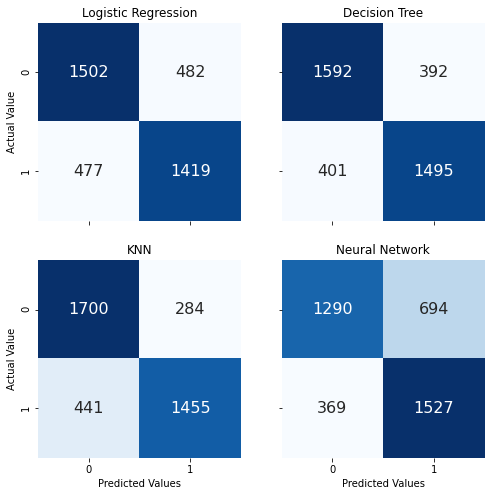

In [14]:
figure, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(8,8))
con_mat = confusion_matrix(y_dev,yhat_dev_lr)    
sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False, ax=axes[0, 0])
con_mat = confusion_matrix(y_dev,yhat_dev_Tree) 
sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False, ax=axes[0, 1])
con_mat = confusion_matrix(y_dev,yhat_dev_knn) 
sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False, ax=axes[1, 0])
con_mat = confusion_matrix(y_dev,yhat_dev_cnn) 
sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False, ax=axes[1, 1])

axes[0, 0].set( ylabel='Actual Value')
axes[1, 0].set(xlabel='Predicted Values', ylabel='Actual Value')
axes[1, 1].set(xlabel='Predicted Values')


axes[0, 0].set_title("Logistic Regression")
axes[0, 1].set_title("Decision Tree")
axes[1, 0].set_title("KNN")
axes[1, 1].set_title("Neural Network")
plt.savefig('./results/Confusion_matrix.pdf',dpi=300)
plt.show()

### ROC Curve
see https://abdalimran.github.io/2019-06-01/Drawing-multiple-ROC-Curves-in-a-single-plot

In [15]:
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
for name, y_hat in {'Logistic Regression':yhat_dev_prob_lr[:,1], 
              'Decision Tree':yhat_dev_prob_Tree[:,1], 
              'KNN':yhat_dev_prob_knn[:,1], 
              'Neural Network':yhat_dev_prob_cnn}.items():
    fpr, tpr, _ = roc_curve(y_dev,  y_hat)
    auc = roc_auc_score(y_dev, y_hat)
    result_table = result_table.append({'classifiers':name,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

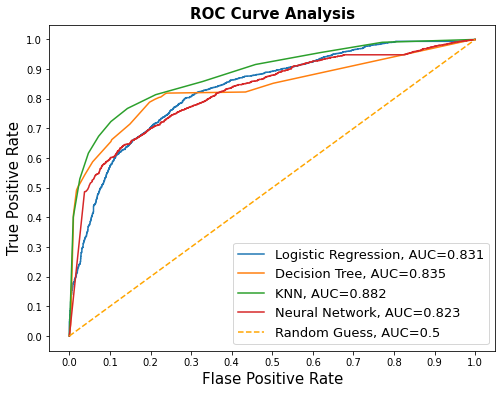

In [16]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(result_table.loc[i]['classifiers'], result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--', label="Random Guess, AUC=0.5")

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.savefig('./results/ROC.pdf',dpi=300)
plt.show()

In [17]:
result_table

,classifiers,fpr,tpr,auc
0,Logistic Regression,"[0.0, 0.0, 0.0, 0.0005040322580645161, 0.00050...","[0.0, 0.0005274261603375527, 0.047468354430379...",0.83
1,Decision Tree,"[0.0, 0.0030241935483870967, 0.009576612903225...","[0.0, 0.0379746835443038, 0.3697257383966245, ...",0.83
2,KNN,"[0.0, 0.009576612903225807, 0.0257056451612903...","[0.0, 0.40031645569620256, 0.5295358649789029,...",0.88
3,Neural Network,"[0.0, 0.037298387096774195, 0.0393145161290322...","[0.0, 0.48628691983122363, 0.4873417721518987,...",0.82


# Performance on test set

## Read test set

In [18]:
df_test = pd.read_pickle('agncl_test.pkl')
print(f'Testing set size: {df_test.shape}')

Testing set size: (11485, 29)


In [20]:
features = list(set(df_test.columns) - {'best_class','AGN','RA','DEC'})
x_test = np.array(df_test[features])
# normalize
x_test = (x_test - x_test.mean(axis=0)) / (x_test.std(axis=0))
# reshape for cnn
x_test_nn = x_test.reshape(-1,26,1,1)

## Load models

In [21]:
# logestic regression
joblib_file = "LR_Model.pkl"  
lr = joblib.load(joblib_file)

# Decesion Tree
joblib_file = "Tree_Model.pkl"  
Tree = joblib.load(joblib_file)

# KNN
joblib_file = "KNN_Model.pkl"  
knn = joblib.load(joblib_file)

# CNN
agn_NN = keras.models.load_model('agn_NN.pd')

## Predict

In [22]:
%%time
yhat_test_lr = lr.predict(x_test)

CPU times: user 88.3 ms, sys: 227 ms, total: 316 ms
Wall time: 15.8 ms


In [23]:
%%time
yhat_test_Tree = Tree.predict(x_test)

CPU times: user 3.35 ms, sys: 464 µs, total: 3.82 ms
Wall time: 2.75 ms


In [24]:
%%time
yhat_test_knn = knn.predict(x_test)

CPU times: user 13.3 s, sys: 0 ns, total: 13.3 s
Wall time: 13.3 s


In [25]:
%%time
yhat_test_cnn0 = agn_NN.predict(x_test_nn, batch_size=512, verbose=1)
yhat_dev_cnn = np.where(yhat_test_cnn0 >= 0.5, 1, 0)

23/23 [==============================] - 0s 3ms/step
CPU times: user 632 ms, sys: 116 ms, total: 748 ms
Wall time: 318 ms


In [26]:
printmd(f'The LR model predicts {round(np.count_nonzero(yhat_test_lr==1)/len(x_test)*100,2)}% testing sample are AGN.')
printmd(f'The DT model predicts {round(np.count_nonzero(yhat_test_Tree==1)/len(x_test)*100,2)}% testing sample are AGN.')
printmd(f'The KNN model predicts {round(np.count_nonzero(yhat_test_knn==1)/len(x_test)*100,2)}% testing sample are AGN.')
printmd(f'The CNN model predicts {round(np.count_nonzero(yhat_dev_cnn==1)/len(x_test)*100,2)}% testing sample are AGN.')

The LR model predicts 50.99% testing sample are AGN.

The DT model predicts 53.97% testing sample are AGN.

The KNN model predicts 38.91% testing sample are AGN.

The CNN model predicts 68.64% testing sample are AGN.

# Result
Version 0: agncl_train.pkl

<font color='blue'>Conclusion:</font>
- The average performance of the models are close, with moderate bias present (f1_train ~ 85-90%) and small varaiance (f1_dev ~ 84-87%). This often indicates the models are not complicated enough. 
- The performance on the major class (agn) is great, with AGN completeness around 95%. However, the performance on the minor class (non-agn) is terrible, with non-AGN completeness ranging from 37% to 60%. 
- The terrible performance of classification of non-agn originates from lack of non-agn data, resulting in a highly imbalanced dataset, which in turn drops the accuracy scores to ~ 70%.
- The performance on  testing set suggests CNN suffer heavily from data imbalance, predicting nearly all of the sample to be AGN. The LR seems to be the most reasonable, predicting 84% positive rate, compared with 83.08% of training set and 82.80% of dev set.
    
<font color='blue'>Possible Improvement:</font>
- Get more non-agn data from other sources to counter the imbalance problem.
- Use more complex models, such as XGBoost decision tree or random forest.
- Train CNN up to 3000 epoches.